# Predict Future Sales

In [1]:
# inserting basic libraries.
import pandas as pd # for creating dataframes and reading the csv file.
import numpy as np # for creating multi-dimensional array and performing array operations.
# importing the data visualizing tools for representing data in graphical view.
import matplotlib.pyplot as plt 
import seaborn as sns

#### Reading the datasets using pandas read_csv function which returns dataframe.

In [2]:
items  = pd.read_csv('items.csv') 
train = pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')
item_category = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

##   I have created some functions which will provides some basic knowledge of the dataset.
#### 1. eda - This function will tell us info, data_types, missing_values,null_values,shape_of data.
#### 2. graph_insight- This Function will show the histgraph of each column of dataset
#### 3. drop_duplicate- will show the no of duplicate entries and drop all the duplicate entries


In [3]:
def explore_data(data):# definning the function
    print("----------Top-5- Record----------")
    print(data.head(5))# displays top five values.
    print("---------------------------------")
    print("-----------Information-----------")
    print(data.info()) # displays basic info of dataset(data_type,column_name,null of non null value,etc)
    print("---------------------------------")
    print("-----------Data Types-----------")
    print(data.dtypes)# displays data types of each columns.
    print("---------------------------------")
    print("----------Missing value-----------")
    print(data.isnull().sum())# displays sum of missing values from each columns.
    print("----------------------]-----------")
    print("----------Null value-----------")
    print(data.isna().sum())# displays sum of num values from each columns.
    print("---------------------------------")
    print("----------Shape of Data----------")
    print(data.shape)# displays shape of of dataframe.
    print("---------------------------------")
def data_insight(data):# defining function for data insight which returns histogram.
    print(set(data.dtypes.tolist())) # prints a set which contains datatypes of each columns.
    df_num = data.select_dtypes(include = ['float64', 'int64'])# dataframe will only contain int64 and float64 ojects.
    df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);# prints histogram with the specified parameters.
    
def drop_duplicate(data, subset):#subset is list where you have to put all column for duplicate check
    print('Before drop shape:', data.shape)# prints shape of the dataframe
    before = data.shape[0] # no of rows of data 
    data.drop_duplicates(subset,keep='first', inplace=True) #drops the duplicate rows
    data.reset_index(drop=True, inplace=True)# reset index
    print('After drop shape:', data.shape)#prints shape of datasets
    after = data.shape[0]# no of rows of data
    print('Total Duplicate:', before-after)# prints total duplicate by subtracting 'before-after'

### Performing Exploratory data Analysis on the following datasets.
#### 1. Sales_Train.csv - this dataset gives the record of total sales of products and which 
####                      we will use for training our model.
#### 2. test.csv - this dataset we will be using for testing our model.
#### 3. items.csv - this dataset gives information of item_id item_name and item_category_id.
#### 4. item_categories.csv - this dataset gives information of category_name and category_id.
#### 5. shops.csv - this dataset gives names and id's of shops. 

# 1.Sales Train Data

Following is the EDA on Sales Train Data
----------Top-5- Record----------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
---------------------------------
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None


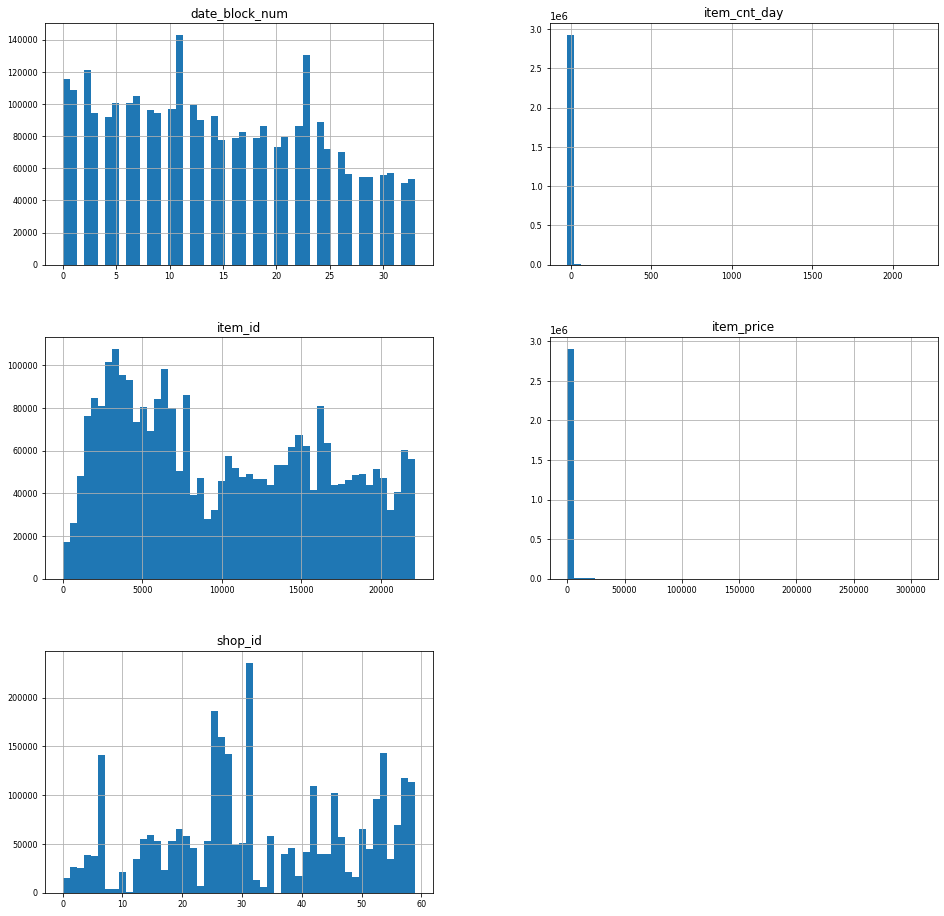

In [4]:
print('Following is the EDA on Sales Train Data')
explore_data(train)
data_insight(train)

In [5]:
# Drop Duplicate Data
subset = ['date', 'date_block_num', 'shop_id', 'item_id','item_cnt_day']
drop_duplicate(train, subset = subset)

Before drop shape: (2935849, 6)
After drop shape: (2935825, 6)
Total Duplicate: 24


# 2.Test Data

----------Top-5- Record----------
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
---------------------------------
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None
---------------------------------
-----------Data Types-----------
ID         int64
shop_id    int64
item_id    int64
dtype: object
---------------------------------
----------Missing value-----------
ID         0
shop_id    0
item_id    0
dtype: int64
----------------------]-----------
----------Null value-----------
ID         0
shop_id    0
item_id    0
dtype: int64
---------------------------------
----------

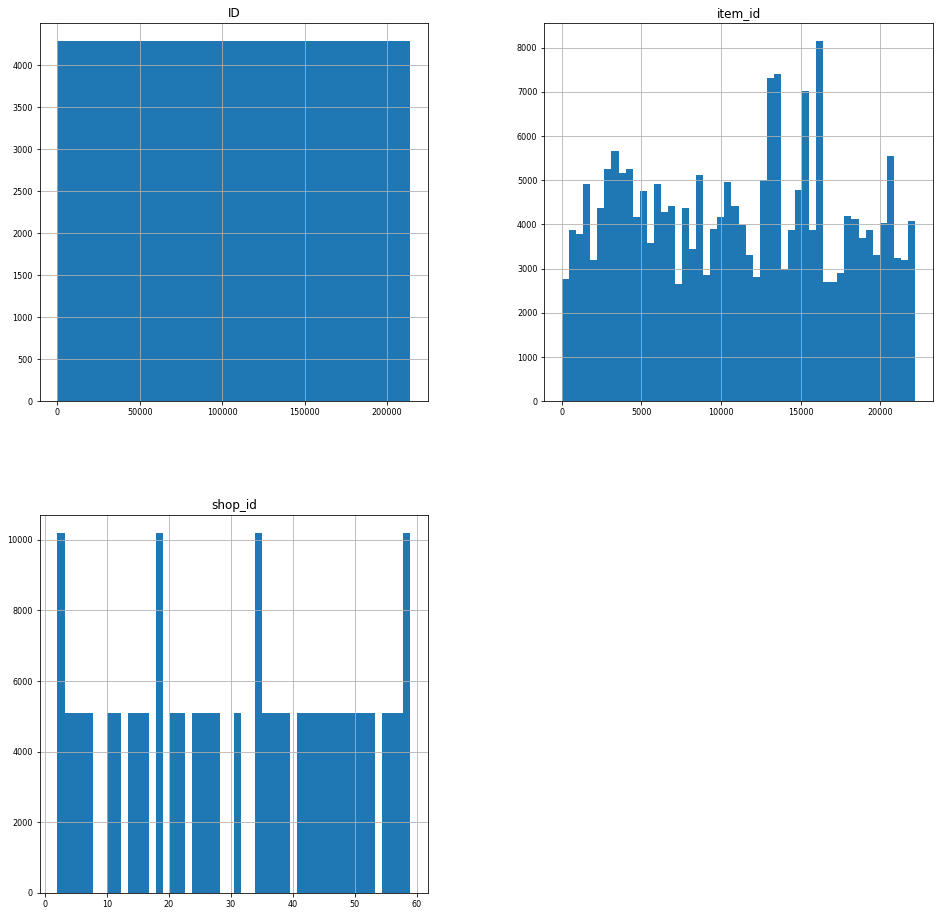

In [6]:
# test insight
explore_data(test)
data_insight(test)

# 3. Items

----------Top-5- Record----------
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
---------------------------------
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory us

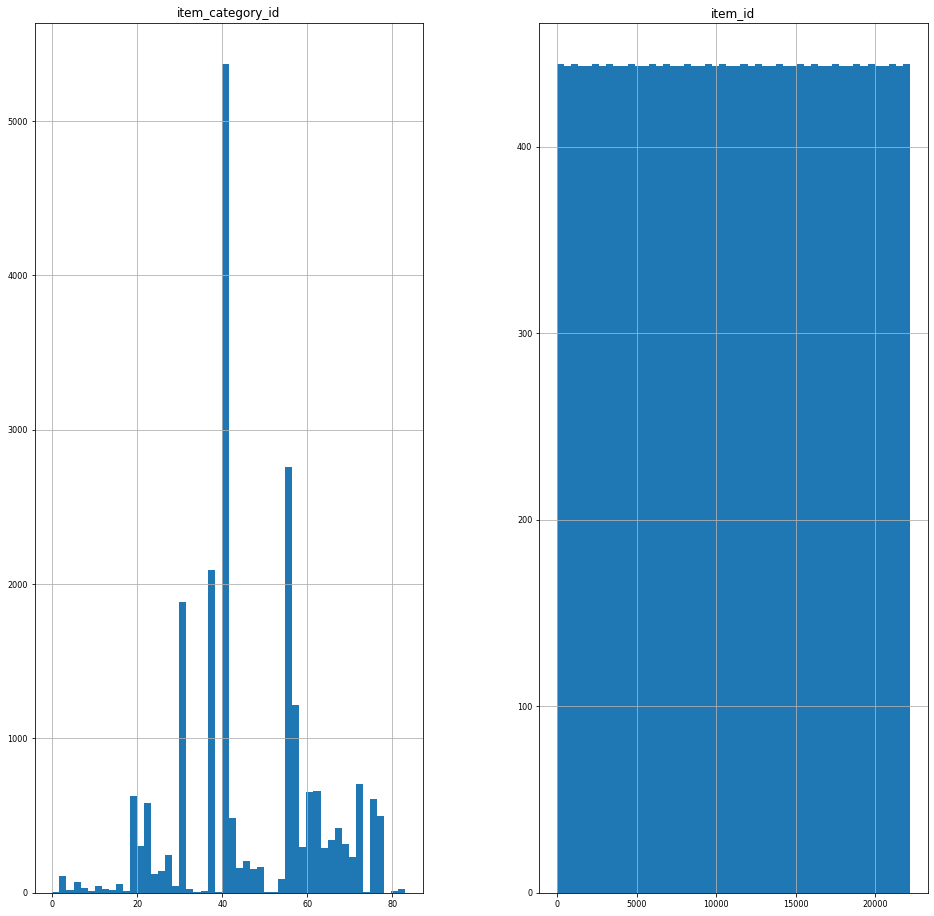

In [7]:
# test insight
explore_data(items)
data_insight(items)

# 4. Item Category

In [8]:
explore_data(item_category)

----------Top-5- Record----------
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
---------------------------------
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
---------------------------------
-----------Data Types-----------
item_category_name    object
item_category_id       int64
dtype: object
---------------------------------
----------Missing value-----------
item_category_name    0
item_category_id      0
dtype: int64
----------

# 5. Shops

In [9]:
explore_data(shops)

----------Top-5- Record----------
                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4
---------------------------------
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
---------------------------------
-----------Data Types-----------
shop_name    object
shop_id       int64
dtype: object
---------------------------------
----------Missing value-----------
shop_name    0
shop_id      0
dtype: int64
----------------------]-----------
----------Null value-----------
shop_name    0
shop_id     

# Sales Per Month

#### In this senario we need to predict how the sales has been taken place in recent months.
#### so I have made an analysis using the histogram and lineplot which shows that how sales has been taken month wise

Text(0, 0.5, 'Price')

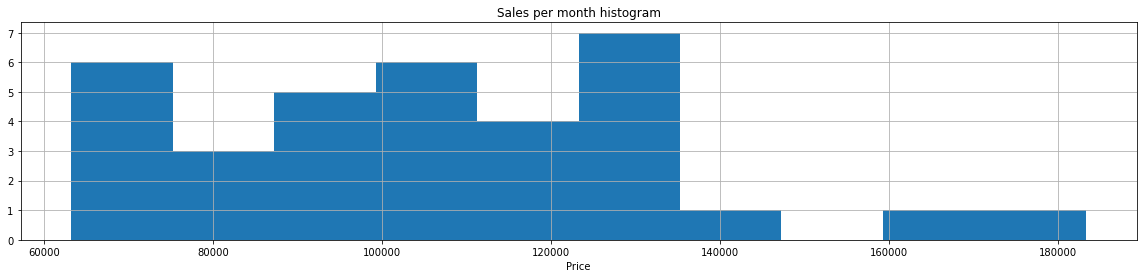

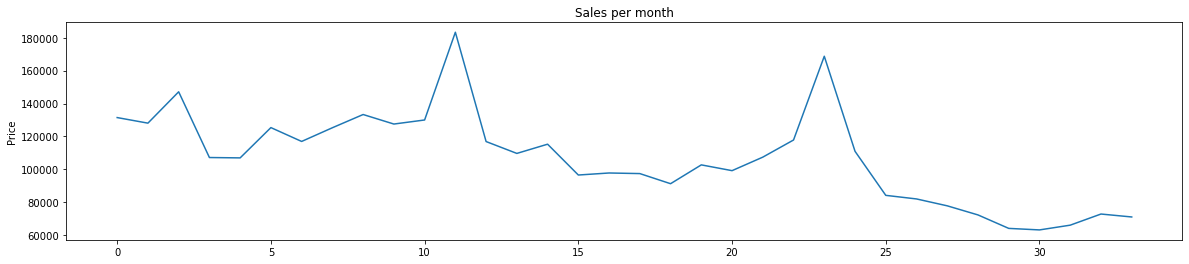

In [10]:
train.groupby('date_block_num').sum()['item_cnt_day'].hist(figsize = (20,4))
plt.title('Sales per month histogram')
plt.xlabel('Price')
date_block=train.groupby('date_block_num').sum()['item_cnt_day']
plt.figure(figsize = (20,4))
sns.lineplot(data=date_block)
plt.title('Sales per month')
plt.ylabel('Price')

#### function - unresanable_data gives the min max mean median values of the data set

In [11]:
def unresanable_data(data):
    print("Min Value:",data.min())
    print("Max Value:",data.max())
    print("Average Value:",data.mean())
    print("Center Point of Data:",data.median())

#### now from the data set and above study I have analyzed that there are some outliers
#### we have to remove such outliers.

In [12]:
# -1 and 307980 looks like outliers, let's delete them
print('before train shape:', train.shape)
train = train[(train.item_price > 0) & (train.item_price < 300000)]
print('after train shape:', train.shape)

before train shape: (2935825, 6)
after train shape: (2935823, 6)


In [13]:
unresanable_data(train['item_price'])

Min Value: 0.07
Max Value: 59200.0
Average Value: 890.7514892291379
Center Point of Data: 399.0


Min Value: 0.07
Max Value: 59200.0
Average Value: 890.7514892291379
Center Point of Data: 399.0


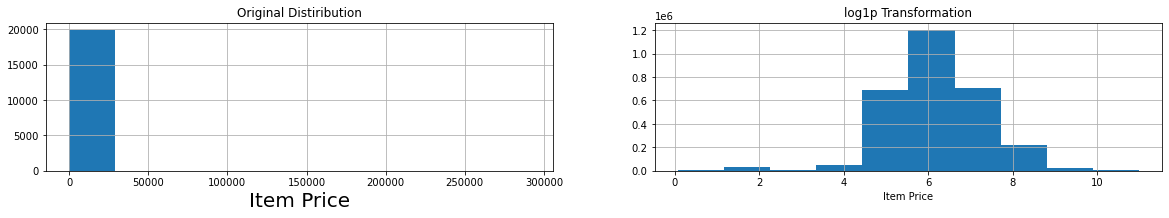

In [14]:
unresanable_data(train['item_price'])
count_price = train.item_price.value_counts().sort_index(ascending=False)
plt.subplot(221)
count_price.hist(figsize=(20,6))
plt.xlabel('Item Price', fontsize=20);
plt.title('Original Distiribution')

plt.subplot(222)
train.item_price.map(np.log1p).hist(figsize=(20,6))
plt.xlabel('Item Price');
plt.title('log1p Transformation')
train.loc[:,'item_price'] = train.item_price.map(np.log1p)

# 3. sales per month count

Text(0.5, 1.0, 'Original Distiribution')

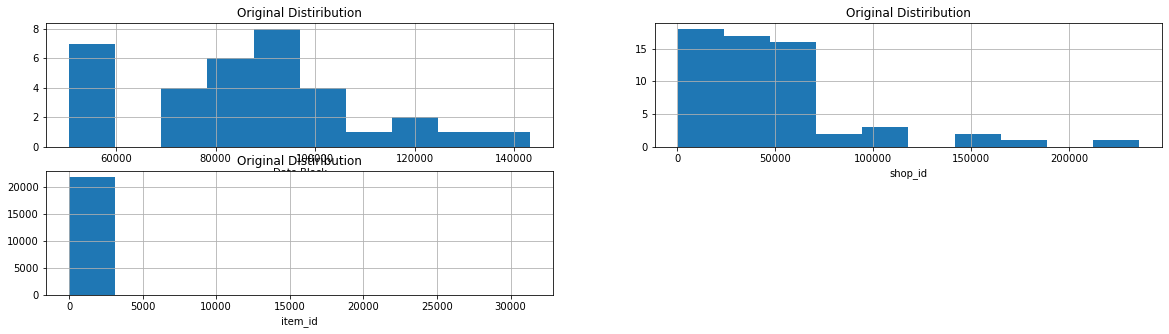

In [15]:
count_price = train.date_block_num.value_counts().sort_index(ascending=False)
plt.subplot(221)
count_price.hist(figsize=(20,5))
plt.xlabel('Date Block');
plt.title('Original Distiribution')

count_price = train.shop_id.value_counts().sort_index(ascending=False)
plt.subplot(222)
count_price.hist(figsize=(20,5))
plt.xlabel('shop_id');
plt.title('Original Distiribution')

count_price = train.item_id.value_counts().sort_index(ascending=False)
plt.subplot(223)
count_price.hist(figsize=(20,5))
plt.xlabel('item_id');
plt.title('Original Distiribution')

#### Mapping the items on the basis of following categories
#### Access, consoles, console games, phone games, cd games,cards, movie,books,music,gifts,softs.

In [16]:
l = list(item_category.item_category_name)
l_cat = l

for ind in range(1,8):
    l_cat[ind] = 'Access'

for ind in range(10,18):
    l_cat[ind] = 'Consoles'

for ind in range(18,25):
    l_cat[ind] = 'Consoles Games'

for ind in range(26,28):
    l_cat[ind] = 'phone games'

for ind in range(28,32):
    l_cat[ind] = 'CD games'

for ind in range(32,37):
    l_cat[ind] = 'Card'

for ind in range(37,43):
    l_cat[ind] = 'Movie'

for ind in range(43,55):
    l_cat[ind] = 'Books'

for ind in range(55,61):
    l_cat[ind] = 'Music'

for ind in range(61,73):
    l_cat[ind] = 'Gifts'

for ind in range(73,79):
    l_cat[ind] = 'Soft'


item_category['cats'] = l_cat
item_category

,item_category_name,item_category_id,cats
0,PC - Гарнитуры/Наушники,0,PC - Гарнитуры/Наушники
1,Аксессуары - PS2,1,Access
2,Аксессуары - PS3,2,Access
3,Аксессуары - PS4,3,Access
4,Аксессуары - PSP,4,Access
...,...,...,...
79,Служебные,79,Служебные
80,Служебные - Билеты,80,Служебные - Билеты
81,Чистые носители (шпиль),81,Чистые носители (шпиль)
82,Чистые носители (штучные),82,Чистые носители (штучные)


#### Changing the date format from train dataset.

In [17]:
train['date'] = pd.to_datetime(train.date,format="%d.%m.%Y")
train.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,6.907755,1.0
1,2013-01-03,0,25,2552,6.802395,1.0
2,2013-01-05,0,25,2552,6.802395,-1.0
3,2013-01-06,0,25,2554,7.444278,1.0
4,2013-01-15,0,25,2555,7.003065,1.0


#### creating pivot table of train data set. 
#### Machine learning model only accepts numerical data.

In [18]:
p_df = train.pivot_table(index=['shop_id','item_id'], columns='date_block_num', values='item_cnt_day',aggfunc='sum').fillna(0.0)
p_df.head()


date_block_num    0     1    2    3    4    5    6    7    8    9   ...   24  \
shop_id item_id                                                     ...        
0       30       0.0  31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        31       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        32       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        33       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        35       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
0       30       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 34 columns]

In [19]:
## Join with categories
train_cleaned_df = p_df.reset_index()
train_cleaned_df['shop_id']= train_cleaned_df.shop_id.astype('str')
train_cleaned_df['item_id']= train_cleaned_df.item_id.astype('str')

item_to_cat_df = items.merge(item_category[['item_category_id','cats']], how="inner", on="item_category_id")[['item_id','cats']]
item_to_cat_df[['item_id']] = item_to_cat_df.item_id.astype('str')

train_cleaned_df = train_cleaned_df.merge(item_to_cat_df, how="inner", on="item_id")

# Encode Categories
from sklearn import preprocessing

number = preprocessing.LabelEncoder()
train_cleaned_df[['cats']] = number.fit_transform(train_cleaned_df.cats)
train_cleaned_df = train_cleaned_df[['shop_id', 'item_id', 'cats'] + list(range(34))]
train_cleaned_df.head()


,shop_id,item_id,cats,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,30,7,0.0,31.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,30,7,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,30,7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,30,7,0.0,4.0,5.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,30,7,0.0,7.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### hyper parameters for our model. 
#### for this model after applying various algorithm i have choosen xgboost model.
#### as it gives best rmse compared to others.

In [20]:

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[1,2,3,4,5,6,10,11,12,15,16],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
    
}

#### Training our Model.

In [21]:
import xgboost as xgb
param = {'max_depth':10, 
         'subsample':1,
         'min_child_weight':0.5,
         'eta':0.3, 
         'num_round':1000, 
         'seed':1,
         'silent':0,
         'eval_metric':'rmse'}

progress = dict()
xgbtrain = xgb.DMatrix(train_cleaned_df.iloc[:,  (train_cleaned_df.columns != 33)].values, train_cleaned_df.iloc[:, train_cleaned_df.columns == 33].values)
watchlist  = [(xgbtrain,'train-rmse')]

bst = xgb.train(param, xgbtrain)
preds = bst.predict(xgb.DMatrix(train_cleaned_df.iloc[:,  (train_cleaned_df.columns != 33)].values))



[22:03:55] WARNING: ../src/learner.cc:516: 
Parameters: { num_round, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




#### Calculating Root mean square value.

In [22]:
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(preds,train_cleaned_df.iloc[:, train_cleaned_df.columns == 33].values))
print(rmse)

1.2689500930744357


#### Merging test data with shop_id and item_id from train dataset.

In [23]:
apply_df = test
apply_df['shop_id']= apply_df.shop_id.astype('str')
apply_df['item_id']= apply_df.item_id.astype('str')
apply_df = test.merge(train_cleaned_df, how = "left", on = ["shop_id", "item_id"]).fillna(0.0)
apply_df.head()

,ID,shop_id,item_id,cats,0,1,2,3,4,5,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
d = dict(zip(apply_df.columns[4:],list(np.array(list(apply_df.columns[4:])) - 1)))
apply_df  = apply_df.rename(d, axis = 1)


In [25]:
preds = bst.predict(xgb.DMatrix(apply_df.iloc[:, (apply_df.columns != 'ID') & (apply_df.columns != -1)].values))

In [26]:
# Normalize prediction to [0-20]
preds = list(map(lambda x: min(20,max(x,0)), list(preds)))
sub_df = pd.DataFrame({'ID':apply_df.ID,'item_cnt_month': preds })
sub_df.describe()

,ID,item_cnt_month
count,214200.000000,214200.000000
mean,107099.500000,0.293469
std,61834.358168,0.686292
min,0.000000,0.000000
25%,53549.750000,0.138123
50%,107099.500000,0.177903
75%,160649.250000,0.279623
max,214199.000000,20.000000


In [27]:
sub_df.to_csv('Submission_Predict Sales.csv',index=False)